# Aspects of Choosing Models


*   Business Problem Statements
*   Technical Problem Statements
*   Non-Functional Requirements
  *   Recency/ SoTA (https://paperswithcode.com/sota)
  *   Accuracy
  *   Time Performance
  *   Financial Cost of Infrastructure/Resources to train & predict




## How to convert a business problem to a technical problem
1. Understand the Business Problem:
  * Meet with Stakeholders: Engage with business stakeholders to thoroughly understand the problem they are facing.
  * Define Objectives: Clearly define the business objectives and desired outcomes.

2. Break Down the Problem:
  * Decompose the Problem:
    * Break down the problem into smaller, manageable components or tasks.
    * Identify dependencies and relationships between different aspects of the problem.

3. Define Scope & Data:
  * Scope Definition:
    * Clearly define the boundaries and scope of the system or solution.
    * Specify what is included and excluded from the project.

  * Data Requirements:
    * Identify the sources of data required for the solution.
  
  * Define Inputs and Outputs:
    * Input Specifications: Clearly define the input requirements for the system.
    * Output Specifications: Specify the expected outputs and deliverables.

## Examples

### Business Problem Statement 1

> "The retail company is experiencing fluctuations in sales and struggles to optimize inventory levels. This leads to occasional stockouts and overstock situations, impacting both customer satisfaction and operational costs. The business needs a solution to predict and manage inventory more effectively."

### Technical Problem Statement 1

> Product-wise Demand Prediction (Regression)

> Product-wise Lead-time Prediction (Regression)





### Business Problem Statement 2

> "The subscription-based service is experiencing a high rate of customer churn, impacting revenue and customer retention. The business needs a solution to predict customer churn and implement targeted retention strategies."

### Technical Problem Statement 2

> Customer Churn Prediction (Classification)

> Customer Segmentation (Clustering)

> Next Best Action (Classification)



## Choosing the right estimator (Modela)

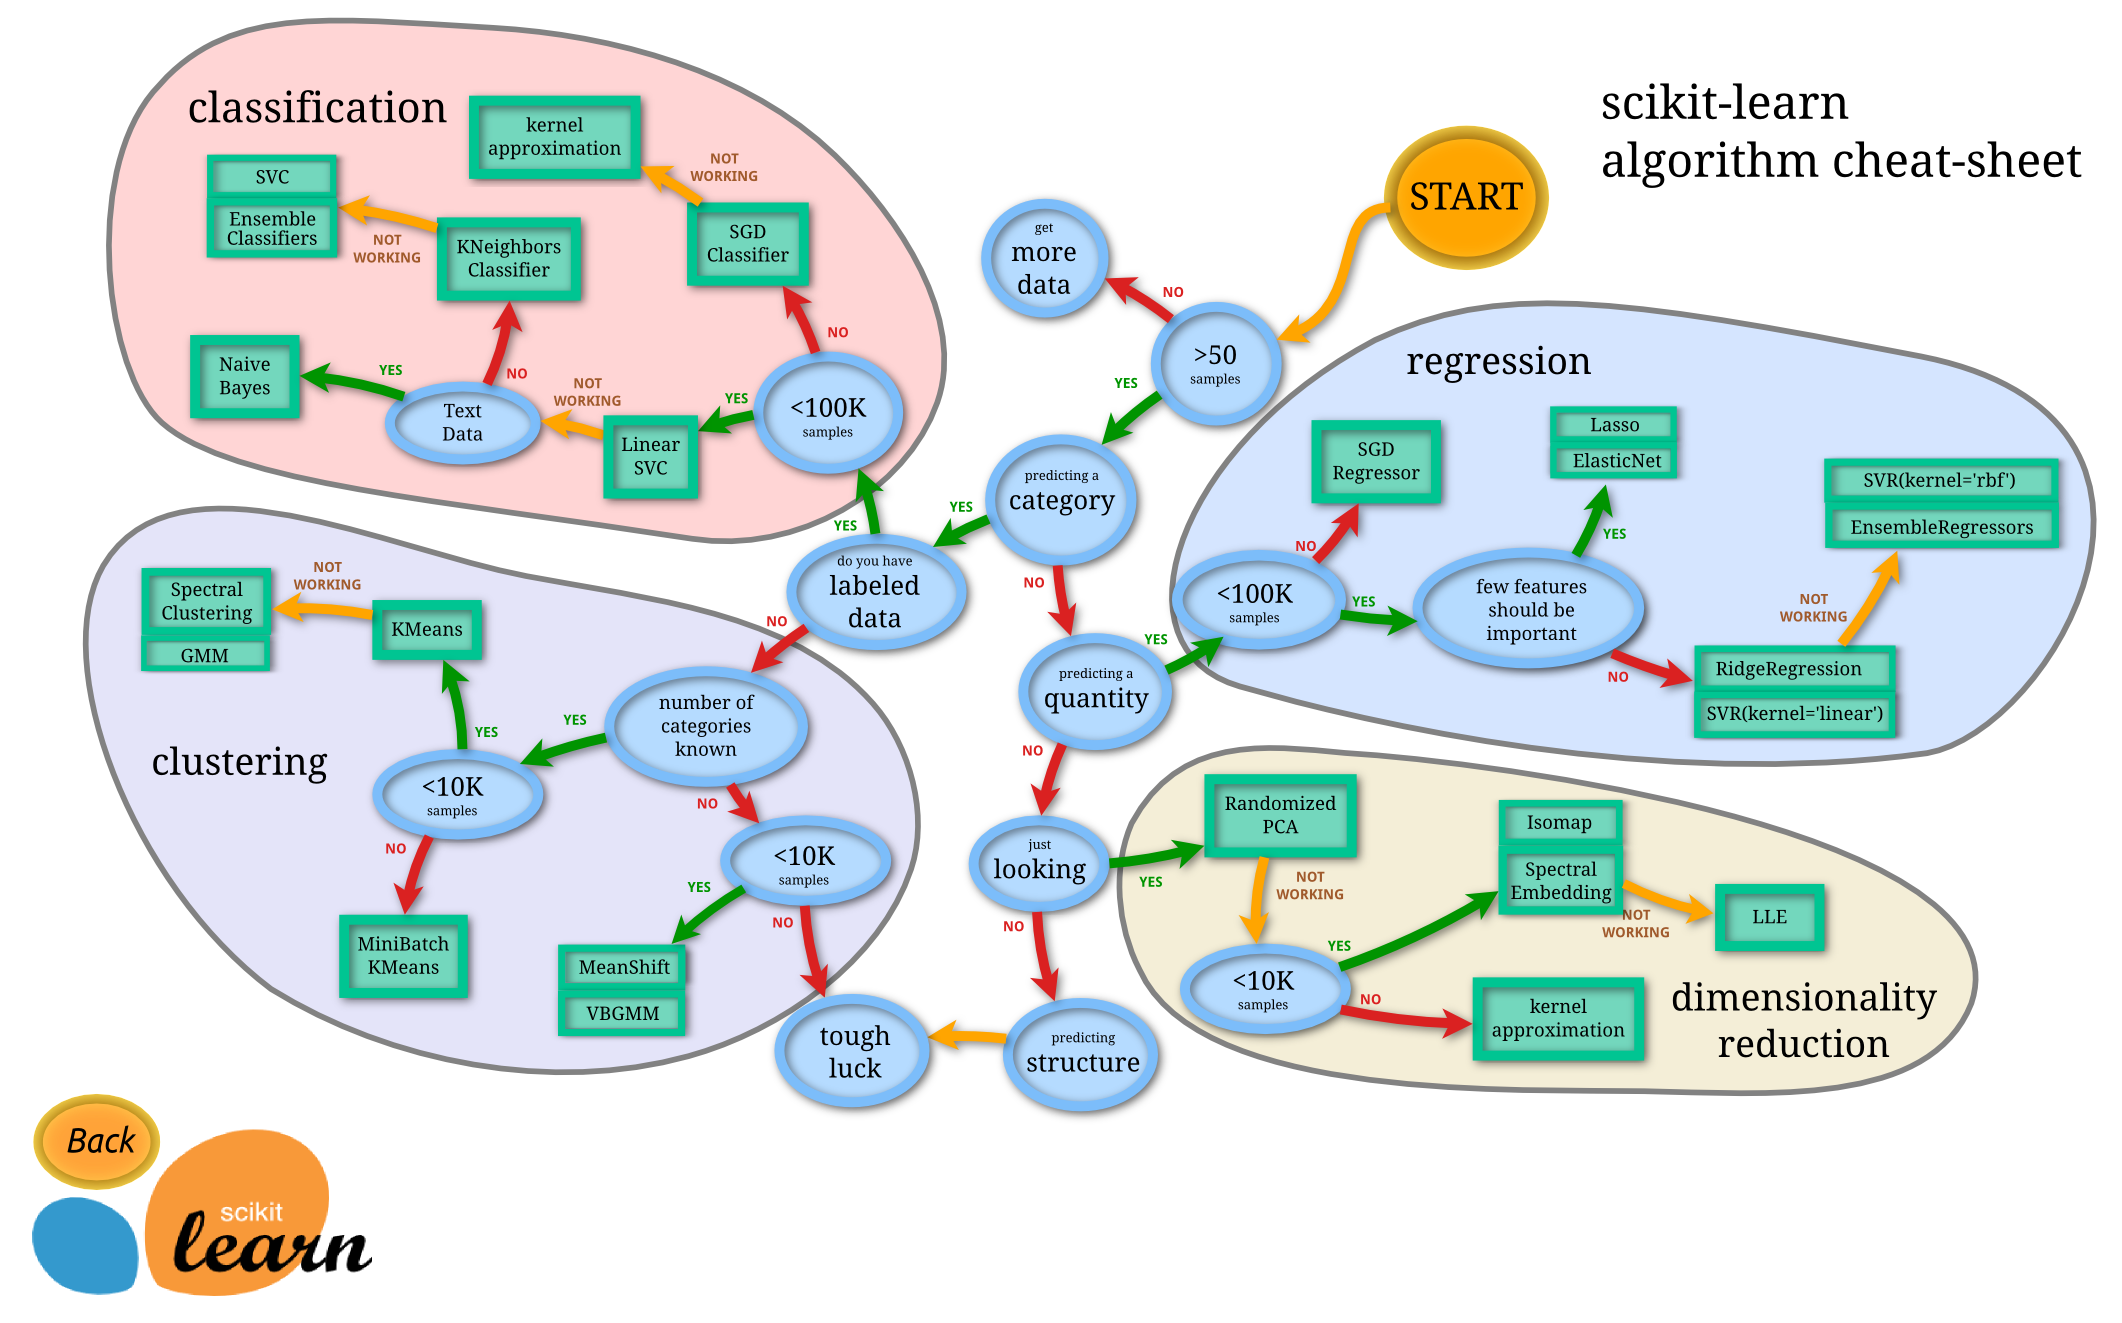

## Grid Search

In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.8 MB/s eta 0:00:00
time: 290 µs (started: 2024-04-20 12:32:34 +00:00)


In [ ]:
help(SVC)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Define the model and the hyperparameter grid
model = SVC() # SVM Model Instance (Instantiation)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Print the best accuracy
print("Best Accuracy:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_
print("Best Model:", best_model)

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best Accuracy: 0.9583333333333334
Best Model: SVC(C=0.1, gamma=0.1, kernel='poly')
Test Accuracy: 1.0
time: 2.78 s (started: 2024-04-20 12:38:51 +00:00)


In [ ]:
# Access the cross-validated results
cv_results = grid_search.cv_results_

# Print information about all the models
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(f"Mean Accuracy: {mean_score:.4f} | Parameters: {params}")

Mean Accuracy: 0.9417 | Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Mean Accuracy: 0.9000 | Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Accuracy: 0.9583 | Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Mean Accuracy: 0.9417 | Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Mean Accuracy: 0.9417 | Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Mean Accuracy: 0.9417 | Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Mean Accuracy: 0.9417 | Parameters: {'C': 0.1, 'gamma': 10, 'kernel': 'linear'}
Mean Accuracy: 0.4667 | Parameters: {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
Mean Accuracy: 0.9417 | Parameters: {'C': 0.1, 'gamma': 10, 'kernel': 'poly'}
Mean Accuracy: 0.9583 | Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Mean Accuracy: 0.9500 | Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Accuracy: 0.9500 | Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
Mean Accuracy: 0.9583 | Parameters: {'C': 1, 'gamma': 1, 'kerne

## TPOT & AutoML

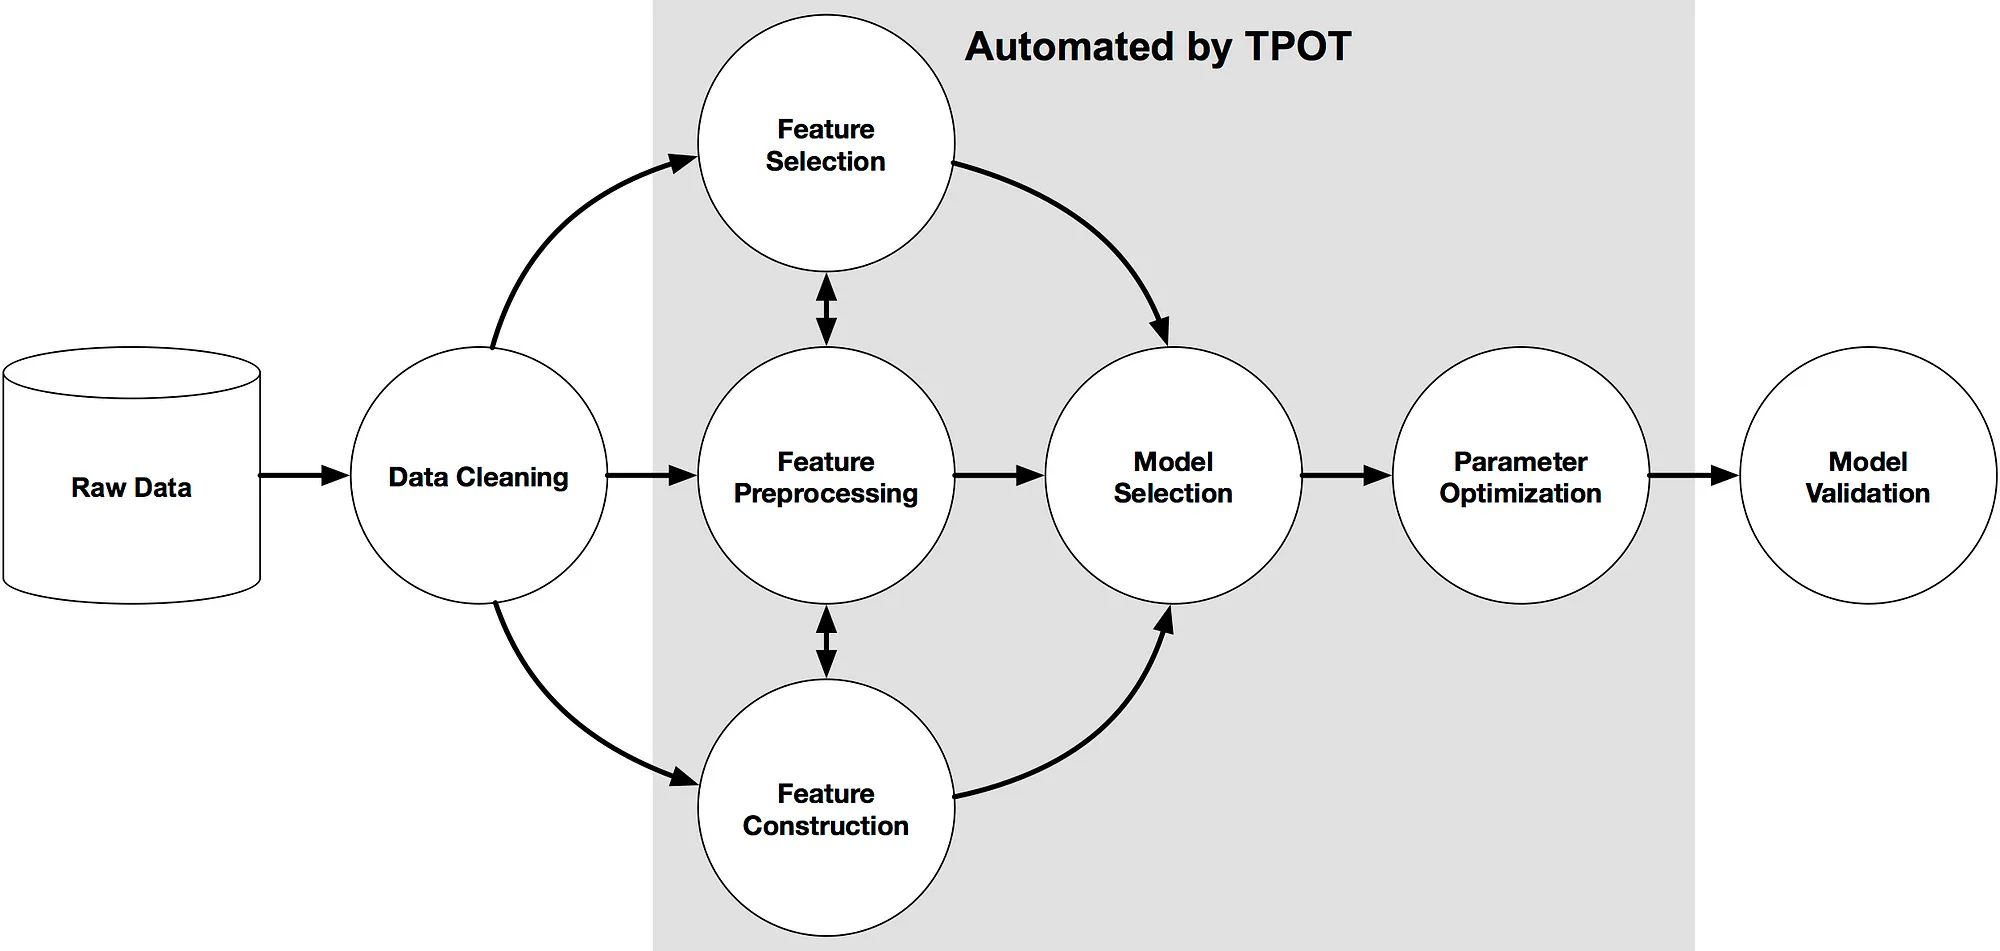

In [ ]:
!pip install tpot

time: 6.53 s (started: 2024-04-20 07:33:55 +00:00)


### Let's try out a Kaggle Competition with tpot!

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

time: 1.98 s (started: 2024-04-20 07:34:02 +00:00)


In [ ]:
# Load the Titanic dataset
titanic_data = pd.read_csv('/content/drive/MyDrive/GFG/50. Model Selection - 20th April, 2024/data/train.csv')

time: 11.7 ms (started: 2024-04-20 07:34:04 +00:00)


In [ ]:
# Preprocessing the data
# Fill missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

# Convert categorical variables to numerical
label_encoders = {}
for column in ['Sex', 'Embarked']:
    label_encoders[column] = LabelEncoder()
    titanic_data[column] = label_encoders[column].fit_transform(titanic_data[column])

time: 8.12 ms (started: 2024-04-20 07:34:04 +00:00)


In [ ]:
# Splitting data into features and target
X = titanic_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

time: 5.47 ms (started: 2024-04-20 07:34:04 +00:00)


In [ ]:
# Instantiate TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42)

# Fit TPOT on training data
tpot.fit(X_train, y_train)

# Evaluate TPOT on test data
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8145671230178273

Generation 2 - Current best internal CV score: 0.8258150300403821

Generation 3 - Current best internal CV score: 0.8272333300502315

Generation 4 - Current best internal CV score: 0.8300305328474342

Generation 5 - Current best internal CV score: 0.8300305328474342

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.5, min_samples_leaf=8, min_samples_split=4, n_estimators=100)
0.8156424581005587
time: 1min 38s (started: 2024-04-20 07:34:04 +00:00)


In [ ]:
# Export the pipeline
tpot.export('tpot_titanic_pipeline.py')

time: 1.7 ms (started: 2024-04-20 07:35:42 +00:00)


### CNN

In [ ]:
# Importing necessary libraries
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output for dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 output classes for digits 0-9

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8446 - loss: 0.5072 - val_accuracy: 0.9821 - val_loss: 0.0649
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9812 - loss: 0.0599 - val_accuracy: 0.9861 - val_loss: 0.0464
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9881 - loss: 0.0369 - val_accuracy: 0.9852 - val_loss: 0.0493
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9910 - loss: 0.0301 - val_accuracy: 0.9885 - val_loss: 0.0388
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9918 - loss: 0.0247 - val_accuracy: 0.9886 - val_loss: 0.0435
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9882 - loss: 0.0397
Test accuracy: 0.9900000095367432
time: 39.6 s (started: 2024-04-20 07:35:42 +00:00)


In [ ]:
# Importing necessary libraries
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model with modified hyperparameters
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # Increased the number of filters
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))  # Increased the number of neurons
model.add(layers.Dropout(0.5))  # Added dropout for regularization
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with modified hyperparameters
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with modified hyperparameters
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7635 - loss: 0.7378 - val_accuracy: 0.9808 - val_loss: 0.0679
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9716 - loss: 0.0971 - val_accuracy: 0.9825 - val_loss: 0.0583
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9823 - loss: 0.0628 - val_accuracy: 0.9875 - val_loss: 0.0431
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9852 - loss: 0.0497 - val_accuracy: 0.9887 - val_loss: 0.0394
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9895 - loss: 0.0362 - val_accuracy: 0.9891 - val_loss: 0.0377
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9898 - loss: 0.0335 - val_accuracy: 0.9904 - val_loss: 0.0361
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9922 - loss: 0.0243 - val_accuracy: 0.9907 - val_loss: 0.0341
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9928 - loss: 0.0228 - val_accuracy: 0

In this example, I increased the number of filters in the third convolutional layer and the number of neurons in the first fully connected layer. Additionally, I added a dropout layer for regularization. Feel free to experiment with other hyperparameters such as learning rate, batch size, and the number of epochs to find the configuration that works best for you.

## Choosing the right model - NLP
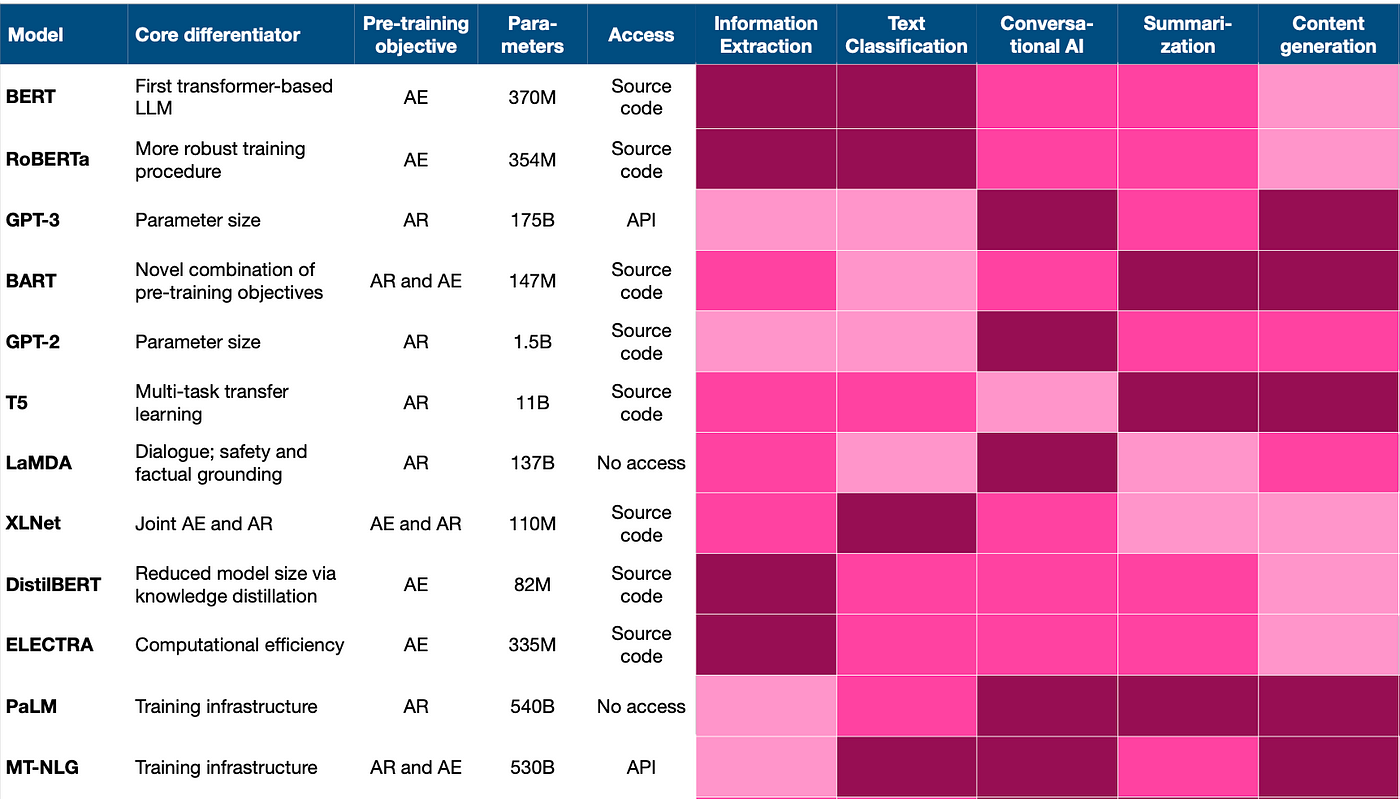

Source: https://towardsdatascience.com/choosing-the-right-language-model-for-your-nlp-use-case-1288ef3c4929